### City of Pittsburgh Intersection Markings
#### CMPINF 0010 Final Project
#### Data Analyzed by Brian Donaghey
[Dataset](https://data.wprdc.org/dataset/city-of-pittsburgh-markings/resource/632fbb91-c55d-4221-a8ad-91c72902bc61)

 Our Question: What neighborhood has the most crosswalks so that pedestrians can safely cross the road?

![walk](https://media.giphy.com/media/7zUBiR8B4bKTK/giphy.gif)

In [2]:
#imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

In [21]:
#reading the data
data = pd.read_csv("data.csv")
data.head()

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267


In [16]:
data.groupby("neighborhood").count()
#tells us how many neighborhoods our data has (88)

,id,type,street,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,
Allegheny Center,41,41,40,41,41,41,41,41,41,41,41,41,41
Allegheny West,26,26,25,26,26,26,26,26,26,26,26,26,26
Allentown,24,24,24,24,24,24,24,24,24,24,24,24,24
Arlington,13,13,13,13,13,13,13,13,13,13,13,13,13
Banksville,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,34,34,34,34,34,34,34,34,34,34,34,34,34
West End,24,24,22,24,24,24,24,24,24,24,24,24,24
West Oakland,41,41,40,41,41,41,41,41,41,41,41,41,41


In [20]:
data.groupby(["neighborhood"]).size().sort_values(ascending=False)
#gets the total amount of crosswalks per neighborhood

neighborhood
Central Business District    402
South Side Flats             262
Squirrel Hill South          239
Bloomfield                   192
Shadyside                    190
                            ... 
Summer Hill                    3
Fineview                       3
Chartiers City                 1
St. Clair                      1
New Homestead                  1
Length: 88, dtype: int64

In [32]:
#removing insignificant neighborhoods (<20 crosswalks)
def filter (x, fifty):
    if len(x) > fifty:
        return True
    else:
        return False
crosswalks = data.groupby('neighborhood').filter(filter,fifty =50)
crosswalks.groupby('neighborhood').count()


,id,type,street,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,
Beechview,69,69,69,69,69,69,69,69,69,69,69,69,69
Bloomfield,192,192,192,192,192,192,192,192,192,192,192,192,192
Bluff,82,82,75,82,82,82,82,82,82,82,82,82,82
Brighton Heights,62,62,62,62,62,62,62,62,62,62,62,62,62
Brookline,86,86,86,86,86,86,86,86,86,86,86,86,86
Carrick,73,73,72,73,71,73,73,73,73,73,73,73,73
Central Business District,402,402,396,402,402,402,402,402,402,402,402,402,402
Central Lawrenceville,81,81,77,81,81,81,81,81,81,81,81,81,81
Central Oakland,113,113,113,113,113,113,113,113,113,113,113,113,113


In [31]:
crosswalksfinal = crosswalks.groupby("neighborhood").size().sort_values(ascending=False)
crosswalksfinal.head(20)

neighborhood
Central Business District    402
South Side Flats             262
Squirrel Hill South          239
Bloomfield                   192
Shadyside                    190
East Liberty                 146
North Oakland                125
Strip District               114
Central Oakland              113
Squirrel Hill North          112
Mount Washington              95
Point Breeze                  91
Brookline                     86
Bluff                         82
Central Lawrenceville         81
Homewood South                81
North Shore                   75
Carrick                       73
Beechview                     69
Hazelwood                     68
dtype: int64

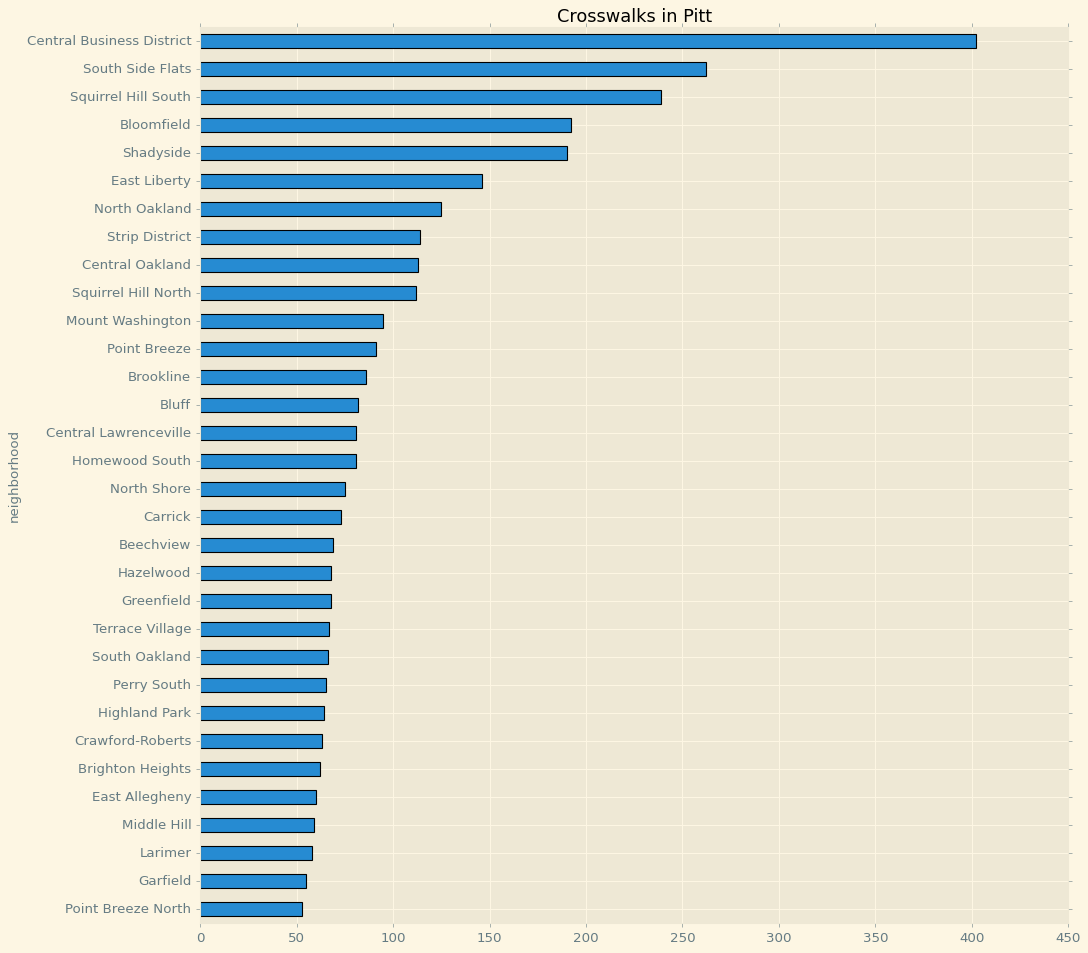

In [52]:
#bar chart
plt.style.use('Solarize_Light2')
crosswalksfinal.plot.barh(title = 'Crosswalks in Pitt', x= 'Neighborhood', y='Number of Crosswalks', figsize=(14,14)).invert_yaxis()


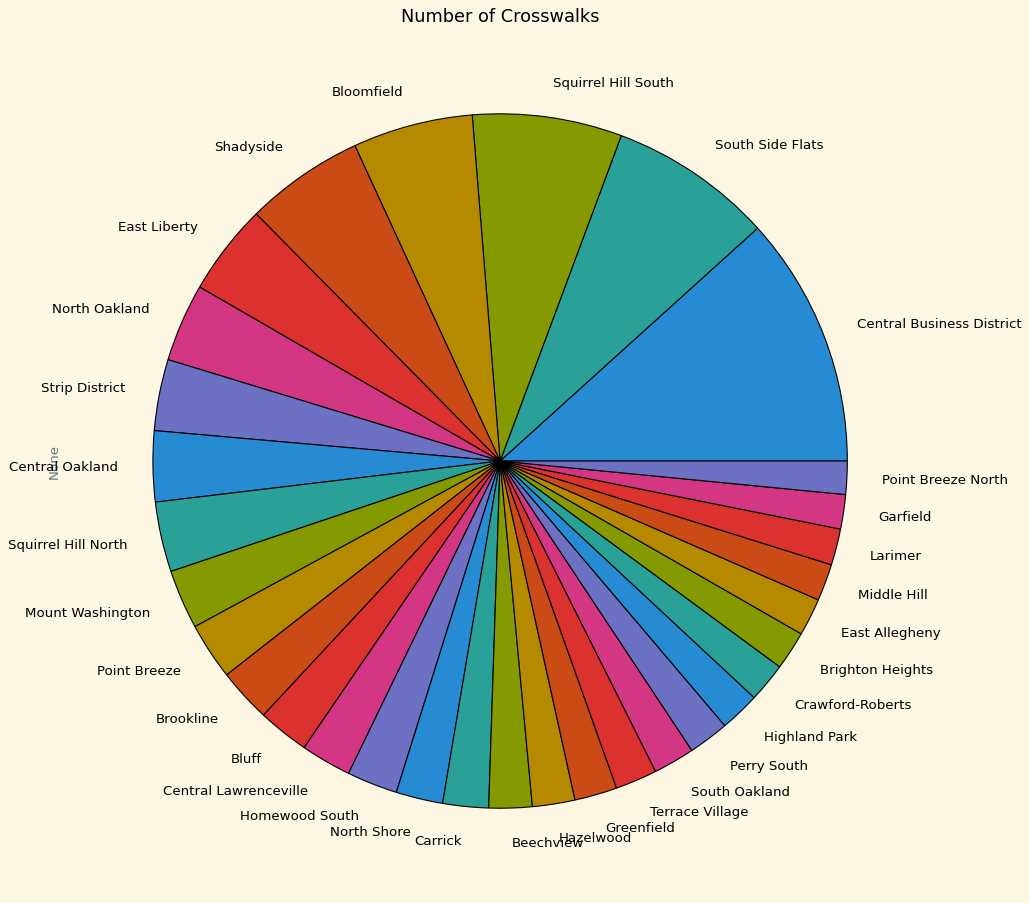

In [53]:
#pie chart
plt.style.use('Solarize_Light2')
crosswalksfinal.plot.pie(figsize = (14,14), title = "Number of Crosswalks")